In [9]:
import pandas as pd
df = pd.read_csv(r".\datasets\winequality-red.csv")

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
#品質値の対応となる辞書
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# pandasのmapで与えられた辞書に基づき値を変換できる
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [13]:
#sampleの引数にfrac=1を指定してデータフレームをシャッフル
#インデックスをリセット
df = df.sample(frac=1).reset_index(drop=True)

# 上位1000個は学習用
df_train = df.head(1000)

#下位599個は検証用
df_test = df.tail(599)

## 決定木モデルで学習

In [27]:
from sklearn import tree
from sklearn import metrics

# 決定木分類気器の初期化
# max_depthは3
clf = tree.DecisionTreeClassifier(max_depth=3)

# 学習に利用する特徴量を指定
cols = ["fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"]
# 与えられた特徴量と対応する目的変数でモデルを学習
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [28]:
# 学習データセットに対する予測
train_predictions = clf.predict(df_train[cols])
#検証データセットに対する予測
test_predictions = clf.predict(df_test[cols])
#学習データセットに対する正答率
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)
#検証データセットに対する正答率
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [29]:
print("学習データ正答率",train_accuracy)
print("検証データ正答率",test_accuracy)

学習データ正答率 0.576
検証データ正答率 0.5692821368948247


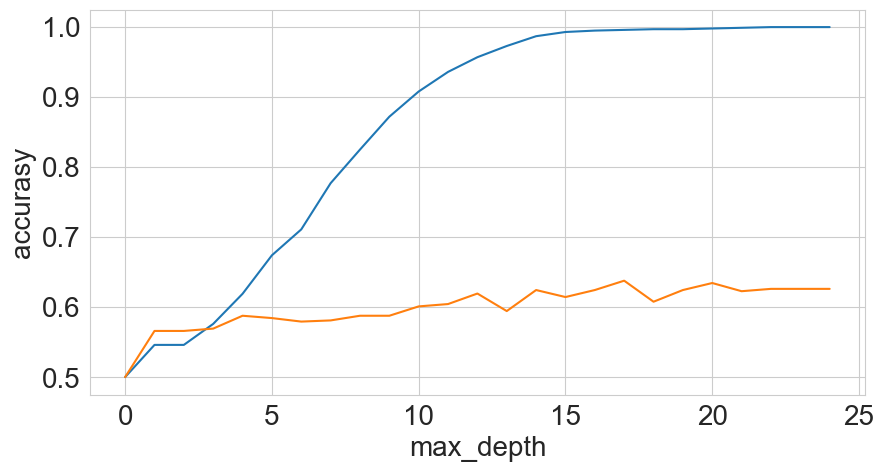

In [31]:
from sklearn import tree 
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# テキストフォントサイズの指定
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

%matplotlib inline

# 正答率を保存していくためのリストの初期化
# 初期値0.5

train_accuracies = [0.5]
test_accuracies = [0.5]

#さまざまなdepthを試す
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    cols = ["fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"]
    # 与えられた特徴量と対応する目的変数でモデルを学習
    clf.fit(df_train[cols], df_train.quality)

    # 学習データセットに対する予測
    train_predictions = clf.predict(df_train[cols])
    #検証データセットに対する予測
    test_predictions = clf.predict(df_test[cols])
    #学習データセットに対する正答率
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    #検証データセットに対する正答率
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )

    # リストに計算結果を追加
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

#可視化
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accurasy", size=20)
plt.show()

max_depthをあげるごとにtrain_accurasyが上がり続け、testが上がらない。\
この現象を過学習という。
## k-fold交差検証
データセットをk個に分割

回帰問題でk-foldを使う場合は、対象をいくつかの塊(ビン)に分割する\
適切なビンを求める手法として、スタージェスの公式というのがある。

### 公式
$$
ビンの数 = 1+log_{2}(N)
$$

In [33]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(df):
    
    # kfoldという新しい列を作り、-1で初期化
    df['kfold'] = -1
    
    # サンプルをシャッフル
    df = df.sample(frac=1).reset_index(drop=True)
    
    """
    スタージェスの公式に基づき、ビン数を計算
    小数点以下を切り捨て、値をint型に変換する
    """
    num_bins = int(np.floor(1 + np.log2(len(df))))
    
    # 目的変数をビンに変換
    df.loc[:, 'bins'] = pd.cut(df['target'], bins=num_bins, labels=False)
    
    # StratifiedKFoldクラスの初期化
    skf = model_selection.StratifiedKFold(n_splits=5)
    
    # skfold列を埋める
    for fold, (train_, val_) in enumerate(skf.split(X=df, y=df.bins.values)):
        df.loc[val_, 'skfold'] = fold
    
    # ビンの列を削除
    df = df.drop('bins', axis=1)
    
    # データセットを新しい列と共に返却
    return df

if __name__ == '__main__':
    
    """
    15000サンプルの回帰データセットを作成
    特徴量は100列で目的変数は1列
    """
    
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )
    
    # 特徴量をpandasのデータフレームに変換
    df = pd.DataFrame(X, columns=[f'f_{i}' for i in range(X.shape[1])])
    df.loc[:, 'target'] = y
    
    # 分割を作成
    df = create_folds(df)